In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import random
from tqdm import tqdm
import cv2
from skimage.io import imread,imshow
from skimage.transform import resize
from tensorflow.keras import backend as K

In [3]:
seed = 42
np.random.seed = seed

In [4]:
TRAIN_PATH = "dataset/2d_slices/model_training_data/train/"
VALIDATION_PATH = "dataset/2d_slices/model_training_data/validation/"
TEST_PATH = "dataset/2d_slices/model_training_data/test/"
TRAIN_MASK_PATH = "dataset/2d_slices/model_training_data/mask_train/"
VALIDATION_MASK_PATH = "dataset/2d_slices/model_training_data/mask_validation/"
TEST_MASK_PATH = "dataset/2d_slices/model_training_data/mask_test/"

In [5]:
train_ids = next(os.walk(TRAIN_PATH))[2]
validation_ids =  next(os.walk(VALIDATION_PATH))[2]
test_ids =  next(os.walk(TEST_PATH))[2]
mask_train_ids = next(os.walk(TRAIN_MASK_PATH))[2]
mask_validation_ids =  next(os.walk(VALIDATION_MASK_PATH))[2]
mask_test_ids =  next(os.walk(TEST_MASK_PATH))[2]

In [6]:
IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 1

In [7]:
X_train = np.zeros((len(train_ids),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
Y_train=np.zeros((len(mask_train_ids),IMG_HEIGHT,IMG_WIDTH,1),dtype = np.uint8)

### Normalizing the image

In [8]:
# We don't need a big range of voxel values(density HU) for lungs. "http://radclass.mudr.org/content/hounsfield-units-scale-hu-ct-numbers"

In [9]:
# We make a bonding on voxel values to be inside [-1200.0, 600.0] and if it was out of the bounding, it would be decreased or increased to be equal to 600 or -1200.
#Then we will scale values to be inside [0.0, 255.0].

In [10]:
def normalize(image):
        MIN_BOUND = -1200
        MAX_BOUND = 600.
        image2 = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
        image2[image2 > 1] = 1.
        image2[image2 < 0] = 0.
        image2 *= 255.
        return image2

In [11]:
print("Resizing and normalizing training images and masks")

Resizing and normalizing training images and masks


In [12]:
for n,id_ in tqdm(enumerate(train_ids),total=len(train_ids)):
    path=TRAIN_PATH+id_
    imgs = np.load(TRAIN_PATH+id_)
    img_normal = normalize(imgs)
    img = resize(img_normal,(IMG_HEIGHT,IMG_WIDTH),mode="constant",preserve_range=True)
    X_train[n]=np.expand_dims(img, axis=2)
    #getting_mask_name
    mask_id_split= id_.split("images")[1]
    mask_id = ("masks"+ mask_id_split)
    #print(mask_id)
    mask = np.load(TRAIN_MASK_PATH+mask_id)
    mask_resize = resize(mask,(IMG_HEIGHT,IMG_WIDTH),mode="constant",preserve_range=True)
    Y_train[n] = np.expand_dims(mask_resize, axis=2)

100%|████████████████████████████████████████████████████████████████████████████████| 427/427 [00:15<00:00, 27.93it/s]


In [13]:
X_validation = np.zeros((len(test_ids),IMG_HEIGHT,IMG_WIDTH),dtype=np.uint8)
Y_validation=np.zeros((len(mask_train_ids),IMG_HEIGHT,IMG_WIDTH),dtype = np.uint8)
#sizes_test=[]
print("Resizing and normalizing validation images")

Resizing and normalizing validation images


In [14]:
c=0
for i,j in enumerate(validation_ids):
    print(i,j)
    c=c+1
print(c)


0 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.309672797925724868457151381131_144.npy
1 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.310395752124284049604069960014_40.npy
2 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.310395752124284049604069960014_49.npy
3 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.310395752124284049604069960014_72.npy
4 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.310548927038333190233889983845_109.npy
5 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.312704771348460502013249647868_109.npy
6 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.312704771348460502013249647868_146.npy
7 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.312704771348460502013249647868_177.npy
8 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.313283554967554803238484128406_34.npy
9 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.313283554967554803238484128406_83.npy
10 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.313283554967554803238484128406_98.npy
11 images_1.3.6.1.4.1.14519.5.2.1.6279.6001.313334055029671473836954456733_33.npy
12 images_1.3.6.1.4.1

In [15]:
for n,id_ in tqdm(enumerate(validation_ids),total=len(validation_ids)):
    path=VALIDATION_PATH+id_
    imgs = np.load(VALIDATION_PATH+id_)
    img_normal = normalize(imgs)
    img = resize(img_normal,(IMG_HEIGHT,IMG_WIDTH),mode="constant",preserve_range=True)
    X_validation[n]=img
#     #getting_mask_name
#     mask_id_split= id_.split("images")[1]
#     mask_id = ("masks"+ mask_id_split)
#     #print(mask_id)
#     mask = np.load(VALIDATION_MASK_PATH+mask_id)
#     mask_resize = resize(mask,(IMG_HEIGHT,IMG_WIDTH),mode="constant",preserve_range=True)
#     Y_validation[n] = mask_resize

 50%|████████████████████████████████████████▌                                        | 61/122 [00:01<00:01, 52.90it/s]


IndexError: index 61 is out of bounds for axis 0 with size 61

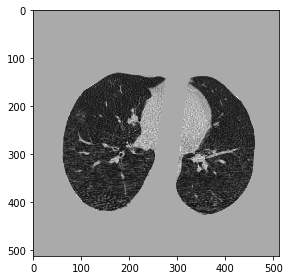

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


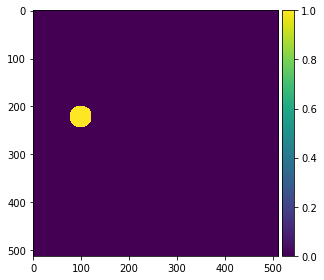

In [16]:
#Checking the training data
ix=random.randint(0,len(train_ids))
imshow(X_train[ix])
plt.show()
imshow(Y_train[ix])
plt.show()

In [18]:
#https://stackoverflow.com/questions/72195156/correct-implementation-of-dice-loss-in-tensorflow-keras
def dice_coef(y_true, y_pred, smooth = 100):        
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice

In [19]:
inputs = tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))

In [20]:
s = tf.keras.layers.Lambda(lambda x:x / 255)(inputs)

### Constructing U NET

In [21]:
c1 = tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer = "he_normal",padding="same")(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c1)
p1=tf.keras.layers.MaxPooling2D((2,2))(c1)

In [22]:
c2=tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2=tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c2)
p2= tf.keras.layers.MaxPooling2D((2,2))(c2)

In [23]:
c3=tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p2)
c3=tf.keras.layers.Dropout(0.2)(c3)
c3=tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c3)
p3=tf.keras.layers.MaxPooling2D((2,2))(c3)

In [24]:
c4=tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p3)
c4=tf.keras.layers.Dropout(0.2)(c4)
c4=tf.keras.layers.Conv2D(126,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c4)
p4=tf.keras.layers.MaxPooling2D((2,2))(c4)

In [25]:
c5=tf.keras.layers.Conv2D(256,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p4)
c5=tf.keras.layers.Dropout(0.3)(c5)
c5=tf.keras.layers.Conv2D(256,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c5)
p5=tf.keras.layers.MaxPooling2D((2,2))(c5)

In [26]:
#expansive path

In [27]:
u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding="same")(c5)
u6=tf.keras.layers.concatenate([u6,c4])
c6=tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u6)
c6=tf.keras.layers.Dropout(0.2)(c6)
c6=tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c6)

In [28]:
u7=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding="same")(c6)
u7=tf.keras.layers.concatenate([u7,c3])
c7=tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u7)
c7=tf.keras.layers.Dropout(0.2)(c7)
c7=tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c7)

In [29]:
u8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding="same")(c7)
u8=tf.keras.layers.concatenate([u8,c2])
c8=tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u8)
c8=tf.keras.layers.Dropout(0.1)(c8)
c8=tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c8)


In [30]:
u9=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding="same")(c8)
u9=tf.keras.layers.concatenate([u9,c1],axis=3)
c9=tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u9)
c9=tf.keras.layers.Dropout(0.1)(c9)
c9=tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c9)


In [31]:
outputs=tf.keras.layers.Conv2D(1,(1,1),activation="sigmoid")(c9)

In [33]:
model_unet=tf.keras.Model(inputs=[inputs],outputs=[outputs])
model_unet.compile(optimizer="adam",loss="binary_crossentropy",metrics=[dice_coef])
model_unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 16  0           ['conv2d[0][0]']                 
                                )                                                           

 spose)                         )                                                                 
                                                                                                  
 concatenate_2 (Concatenate)    (None, 256, 256, 64  0           ['conv2d_transpose_2[0][0]',     
                                )                                 'conv2d_3[0][0]']               
                                                                                                  
 conv2d_14 (Conv2D)             (None, 256, 256, 32  18464       ['concatenate_2[0][0]']          
                                )                                                                 
                                                                                                  
 dropout_7 (Dropout)            (None, 256, 256, 32  0           ['conv2d_14[0][0]']              
                                )                                                                 
          

In [34]:
checkpointer= tf.keras.callbacks.ModelCheckpoint("model_for_nuclei.h5",verbose=1,save_best_only=True)

In [35]:
callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=5,monitor="val_loss"),
    tf.keras.callbacks.TensorBoard(log_dir="logs"),
    checkpointer
]

In [ ]:
 results = model_unet.fit(X_train,Y_train,validation_split=0.2,batch_size=16,epochs=100,callbacks=callbacks )

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 0.0790 - dice_coef: 0.0129 
Epoch 1: val_loss improved from inf to 0.02634, saving model to model_for_nuclei.h5
22/22 [==============================] - 405s 18s/step - loss: 0.0790 - dice_coef: 0.0129 - val_loss: 0.0263 - val_dice_coef: 0.0136
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 0.0257 - dice_coef: 0.0109 
Epoch 2: val_loss improved from 0.02634 to 0.02310, saving model to model_for_nuclei.h5
22/22 [==============================] - 441s 20s/step - loss: 0.0257 - dice_coef: 0.0109 - val_loss: 0.0231 - val_dice_coef: 0.0145
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 0.0217 - dice_coef: 0.0114 
Epoch 3: val_loss did not improve from 0.02310
22/22 [==============================] - 445s 20s/step - loss: 0.0217 - dice_coef: 0.0114 - val_loss: 0.0234 - val_dice_coef: 0.0151
Epoch 4/100
22/22 [==============================] - ETA: 0s - loss: 0.0198 - dice_coef: 0.

#### Checking the model on random images

In [ ]:
idx = random.randint(0,len(X_train))

In [ ]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)],verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):],verbose=1)
preds_test=model.predict(X_test,verbose=1)

In [ ]:
#Each pixel is given a value between 0 and 1. We set a threshold 0.5 to binarize using thresholding

In [ ]:
preds_train_t = (preds_train >0.6).astype(np.uint8)
preds_val_t = (preds_val>0.6).astype(np.uint8)
preds_test_t = (preds_test>0.6).astype(np.uint8)

In [ ]:
#Checking

In [ ]:
ix = random.randint(0,len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(Y_train[ix])
plt.show()
imshow(preds_train_t[ix])
plt.show()